In [ ]:
from google.colab import files

uploaded = files.upload()


Saving credit_card.xlsx to credit_card.xlsx


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('credit_card.xlsx')

In [ ]:
# Display the first few rows of the dataset
df.head()

# Check basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 20071 non-null  int64  
 1   Attrition_Flag            20071 non-null  object 
 2   Customer_Age              20071 non-null  int64  
 3   Gender                    20071 non-null  object 
 4   Dependent_count           20071 non-null  int64  
 5   Education_Level           20071 non-null  object 
 6   Marital_Status            20071 non-null  object 
 7   Income_Category           20071 non-null  object 
 8   Card_Category             20071 non-null  object 
 9   Months_on_book            20071 non-null  int64  
 10  Total_Relationship_Count  20071 non-null  int64  
 11  Months_Inactive_12_mon    20071 non-null  int64  
 12  Contacts_Count_12_mon     20071 non-null  int64  
 13  Credit_Limit              20071 non-null  float64
 14  Total_

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
Quarter                     0
Year                        0
Date_Leave                  0
dtype: int64

In [30]:
# Summary statistics
df.describe().T

count          mean           std          min  \
CLIENTNUM                 20071.0  7.510799e+08  5.472039e+07  708082083.0   
Customer_Age              20071.0  4.633187e+01  8.385922e+00         24.0   
Dependent_count           20071.0  1.954810e+00  1.201685e+00          0.0   
Months_on_book            20071.0  4.103951e+01  1.039205e+01         13.0   
Total_Relationship_Count  20071.0  3.816701e+00  1.553507e+00          1.0   
Months_Inactive_12_mon    20071.0  2.665388e+00  1.612679e+00          0.0   
Contacts_Count_12_mon     20071.0  2.449106e+00  1.104183e+00          0.0   
Credit_Limit              20071.0  8.637126e+03  9.084356e+03       1400.0   
Total_Revolving_Bal       20071.0  1.011000e+03  6.581454e+02          0.0   
Avg_Open_To_Buy           20071.0  7.480057e+03  9.103257e+03          3.0   
Total_Trans_Ct            20071.0  6.781780e+01  2.678619e+01         10.0   
Avg_Utilization_Ratio     20071.0  2.440550e-01  2.348772e-01          0.0   
Year                      20071.0  2.018495e+03  4.999917e-01       2018.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.134855e+08  7.188436e+08  7.810140e+08   
Customer_Age              4.100000e+01  4.700000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.500000e+01  4.100000e+01  4.800000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    1.000000e+00  3.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.548500e+03  4.532000e+03  1.106200e+04   
Total_Revolving_Bal       5.210000e+02  1.002000e+03  1.418500e+03   
Avg_Open_To_Buy           1.312500e+03  3.474000e+03  9.904000e+03   
Total_Trans_Ct            4.500000e+01  6.900000e+01  8.600000e+01   
Avg_Utilization_Ratio     5.000000e-02  1.600000e-01  3.900000e-01   
Year                      2.018000e+03  2.018000e+03  2.019000e+03   

                                   max  
CLIENTNUM                 9.002031e+08  
Customer_Age              6.500000e+01  
Dependent_count           5.000000e+00  
Months_on_book            6.800000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.500000e+04  
Total_Revolving_Bal       1.208000e+04  
Avg_Open_To_Buy           3.451600e+04  
Total_Trans_Ct            1.390000e+02  
Avg_Utilization_Ratio     9.990000e-01  
Year                      2.019000e+03

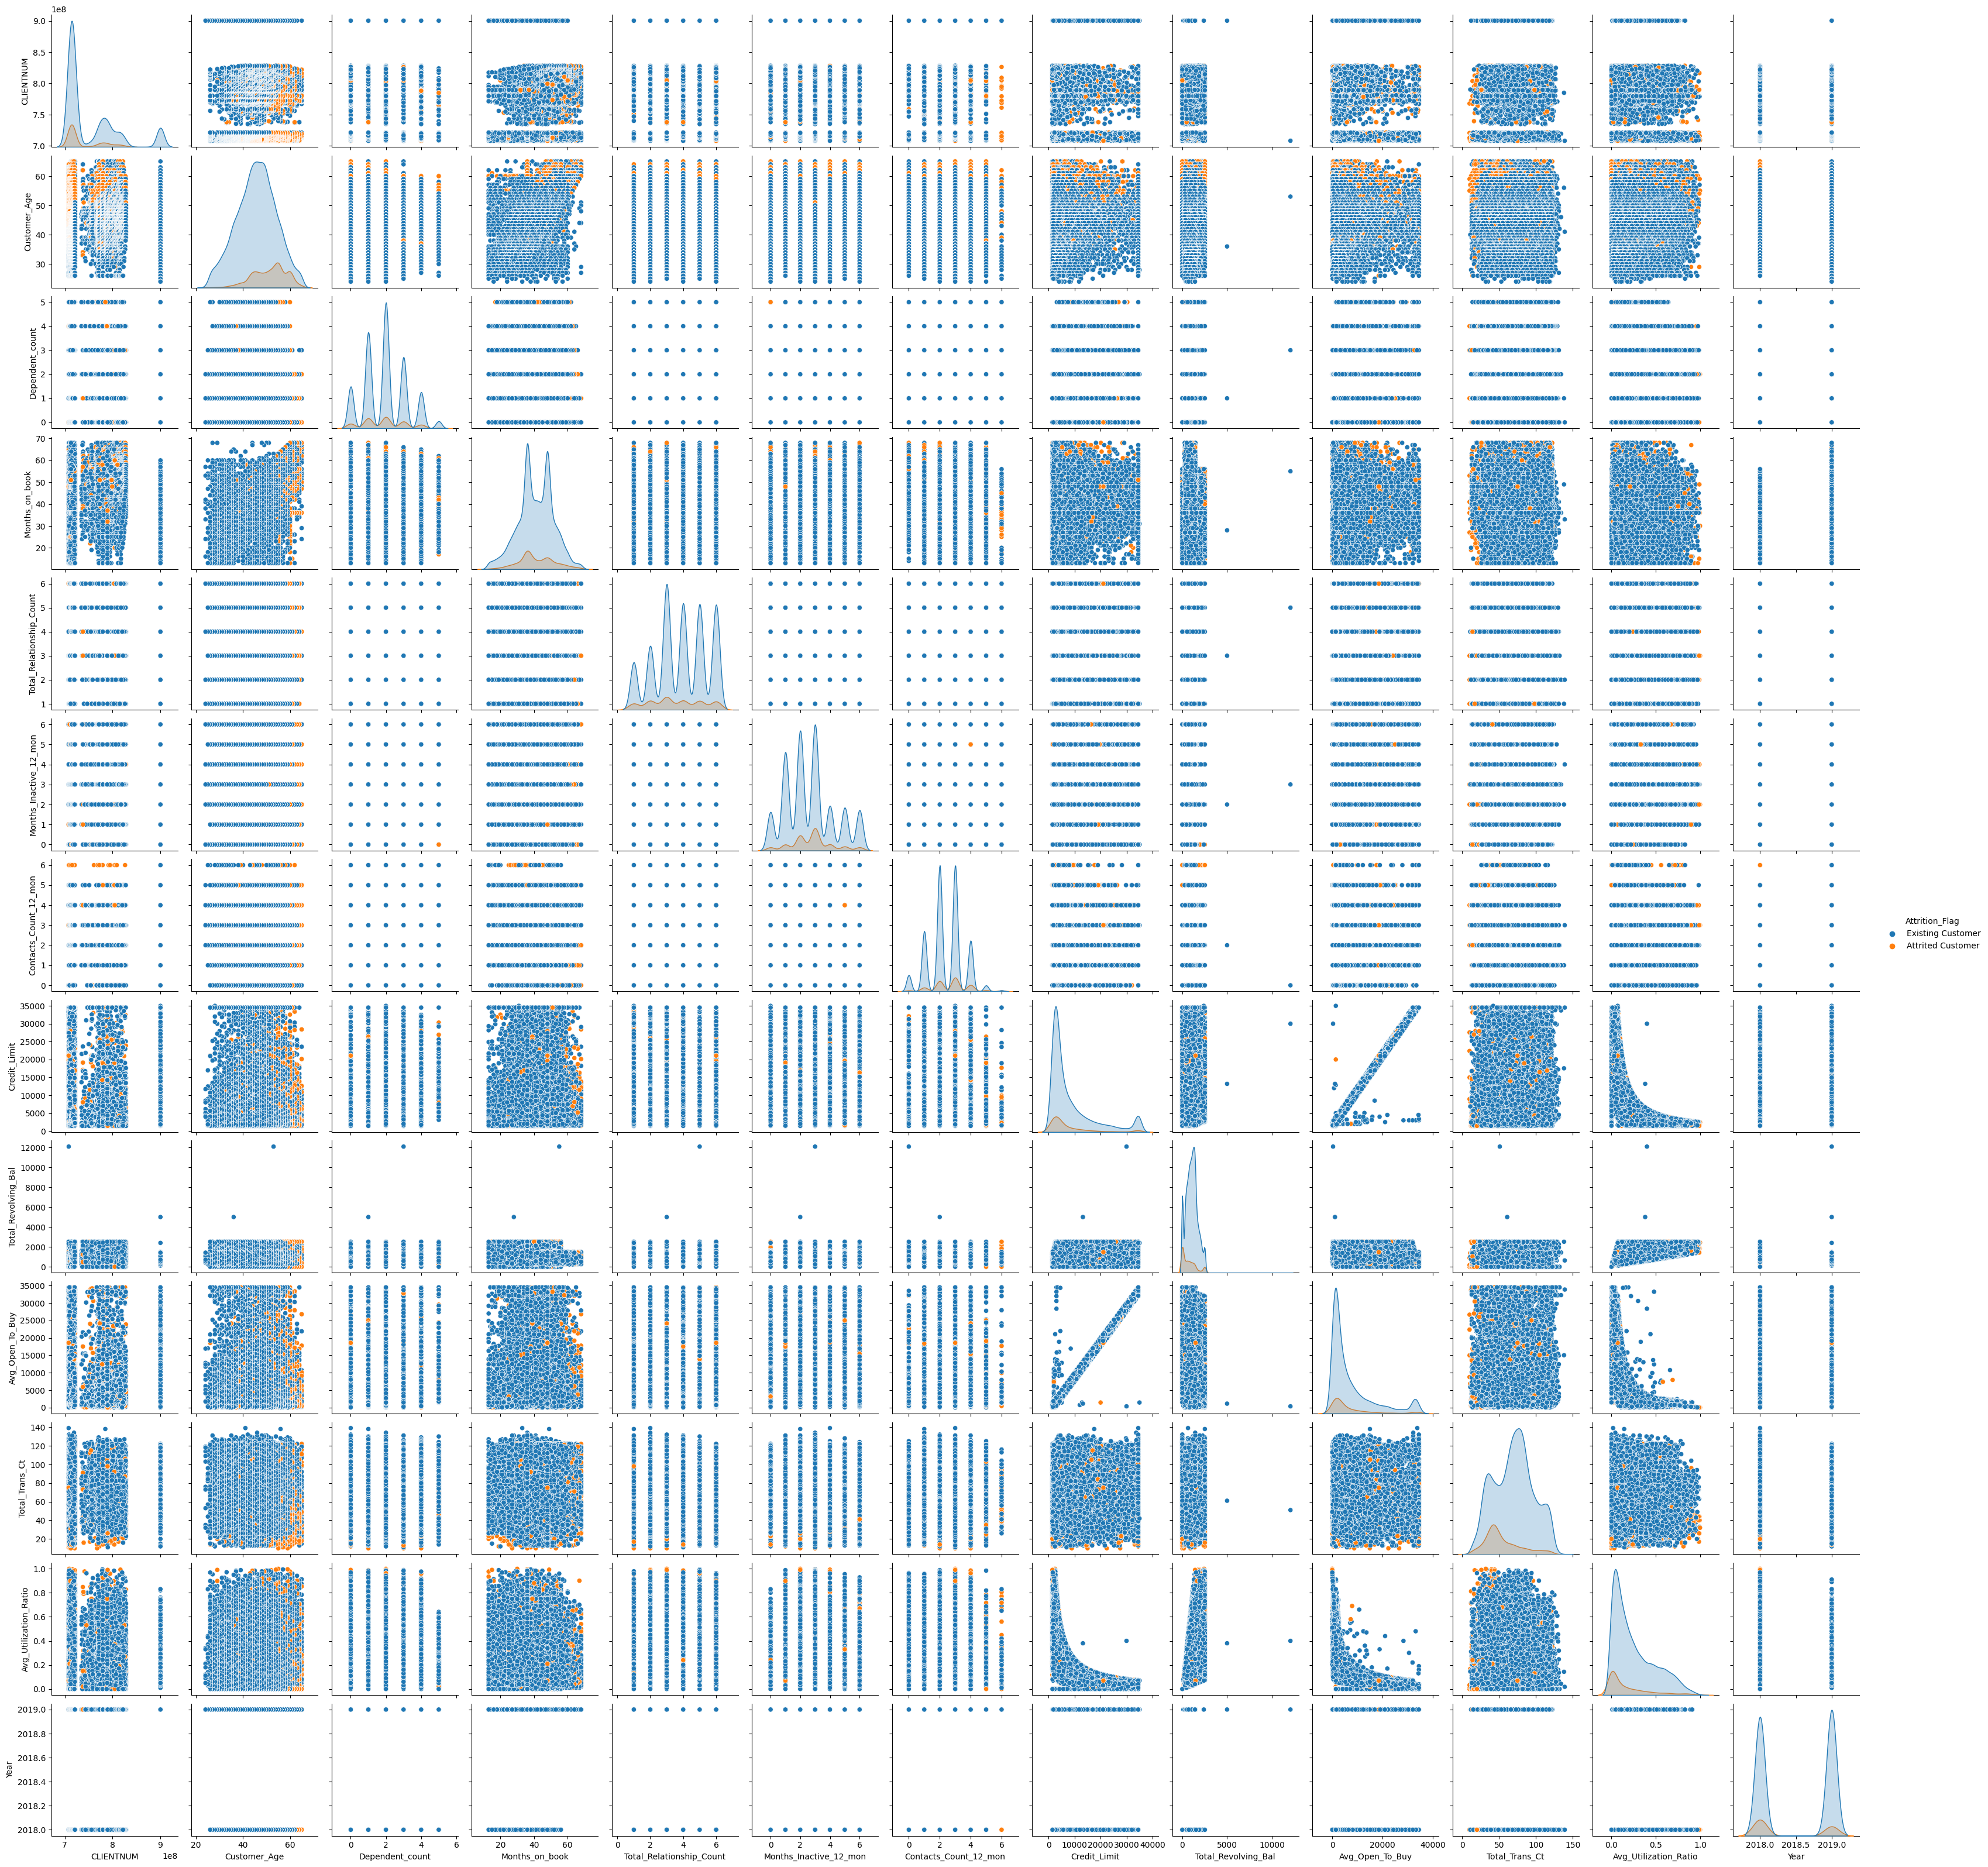

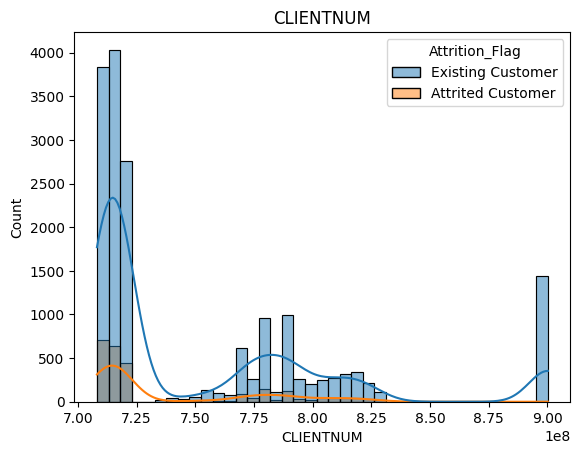

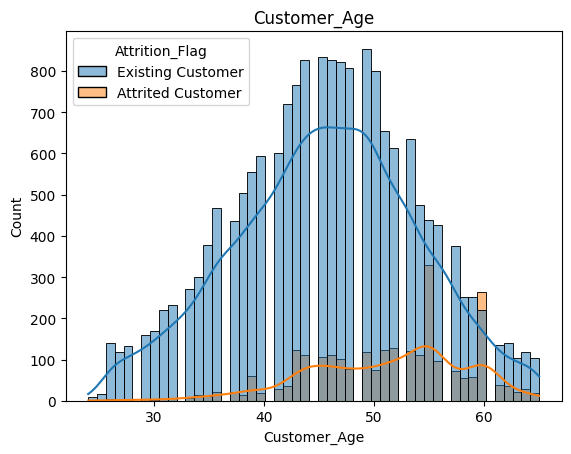

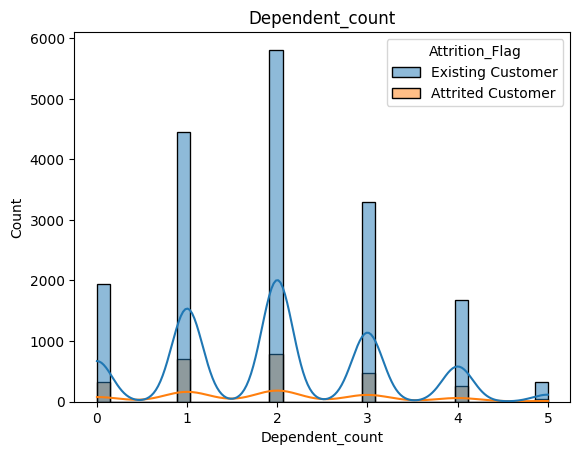

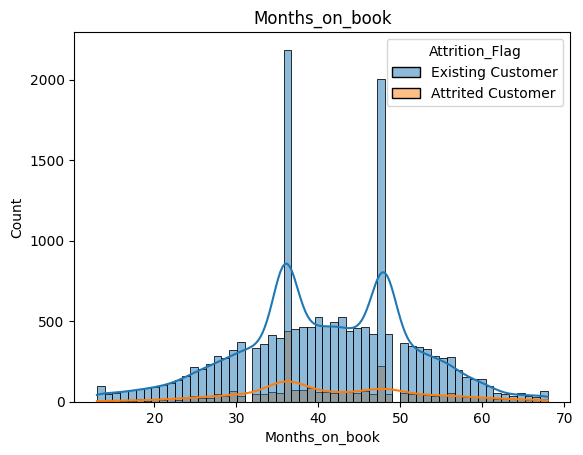

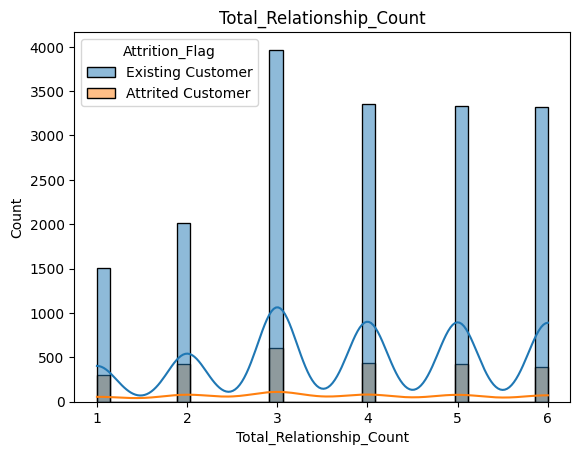

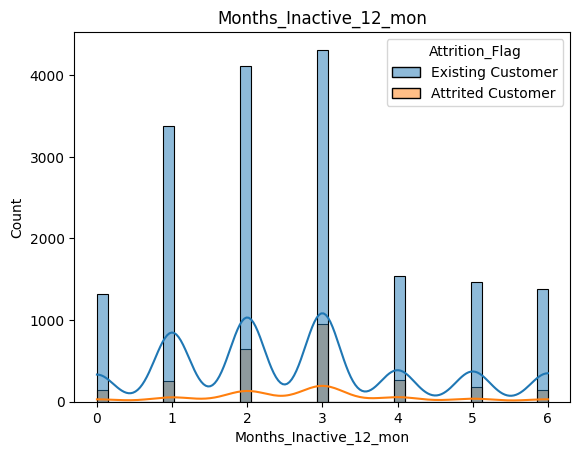

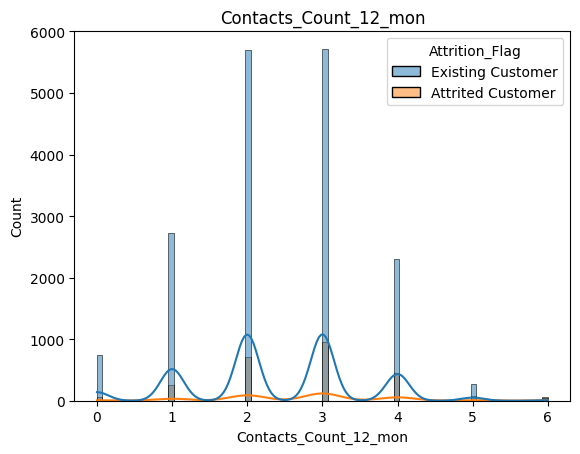

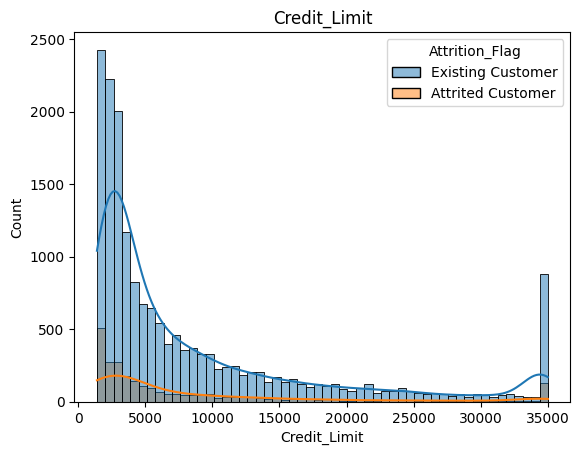

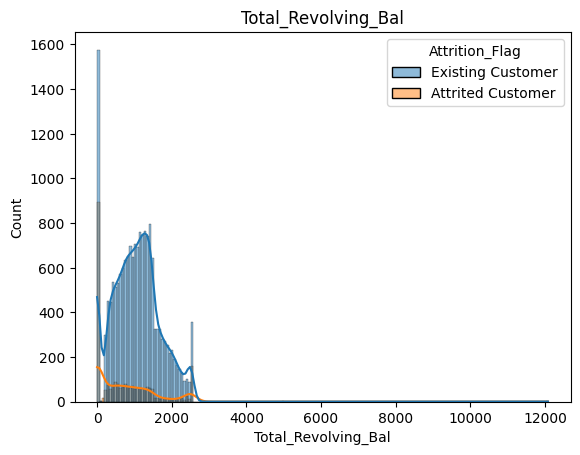

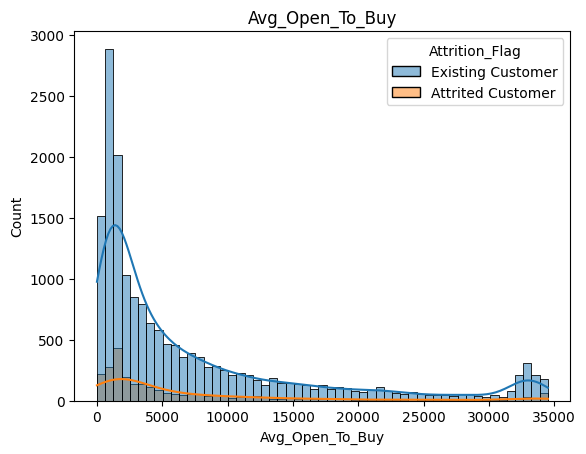

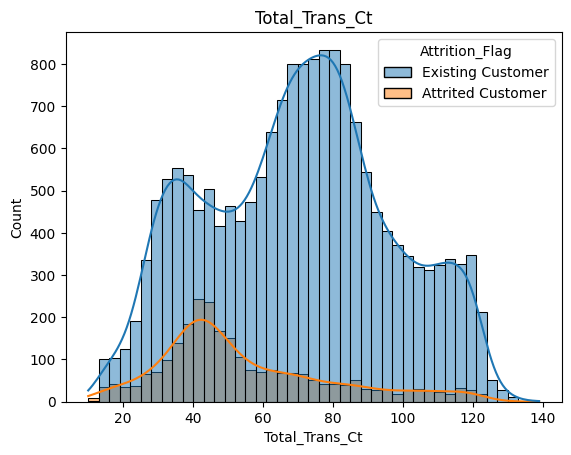

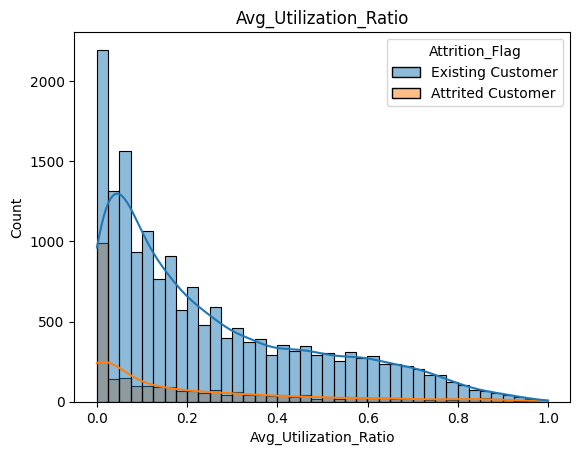

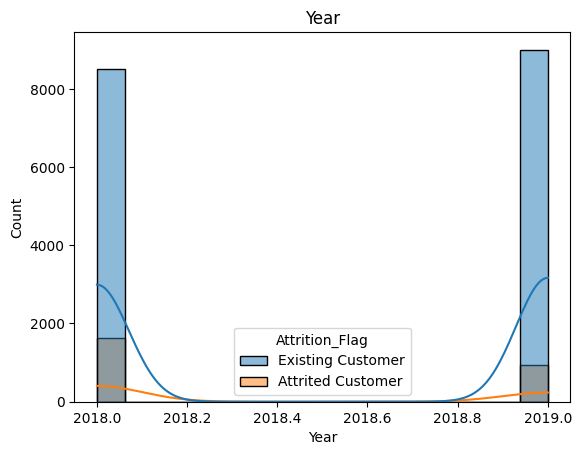

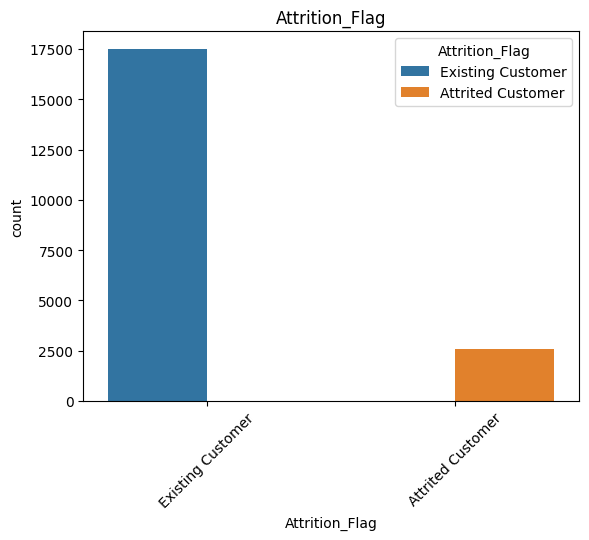

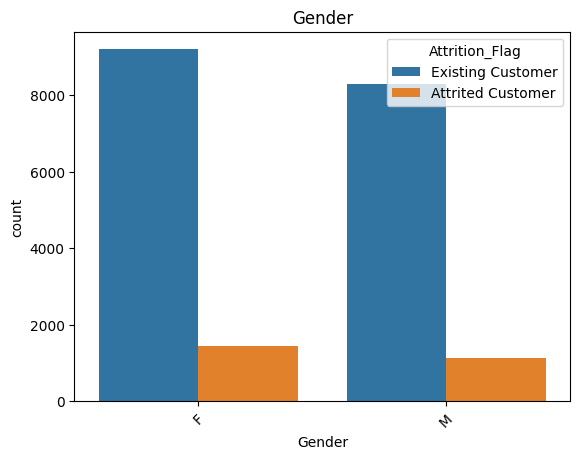

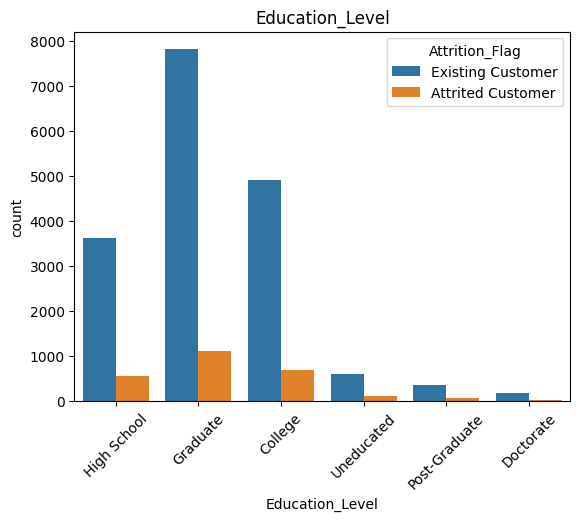

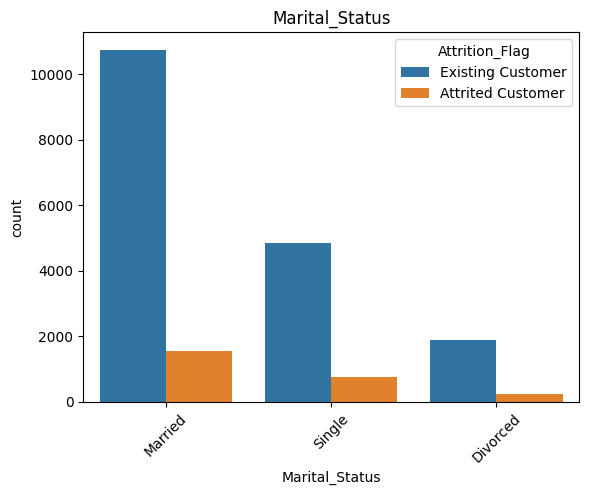

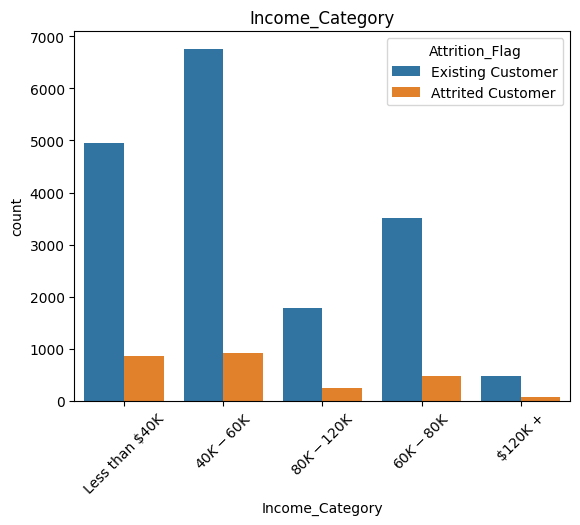

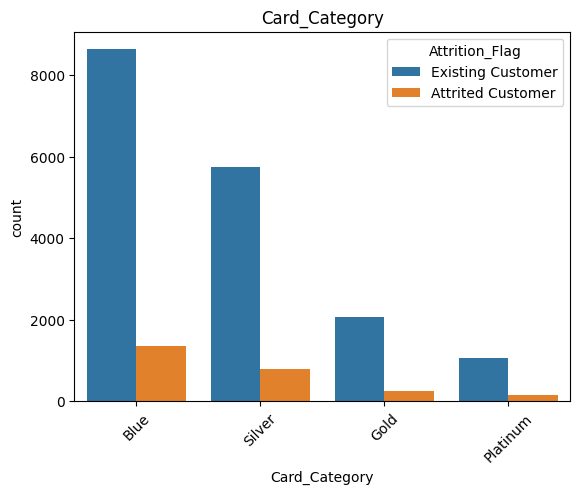

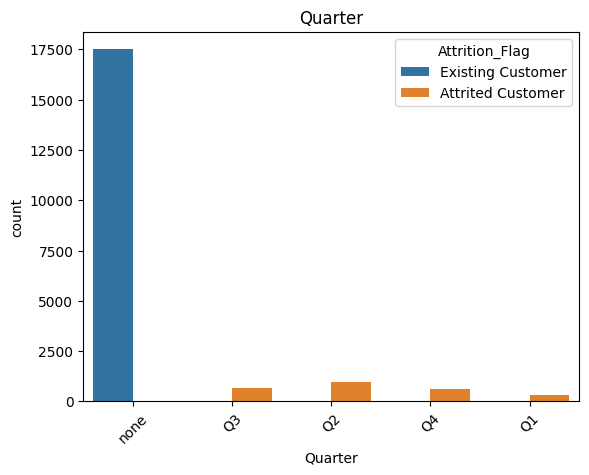

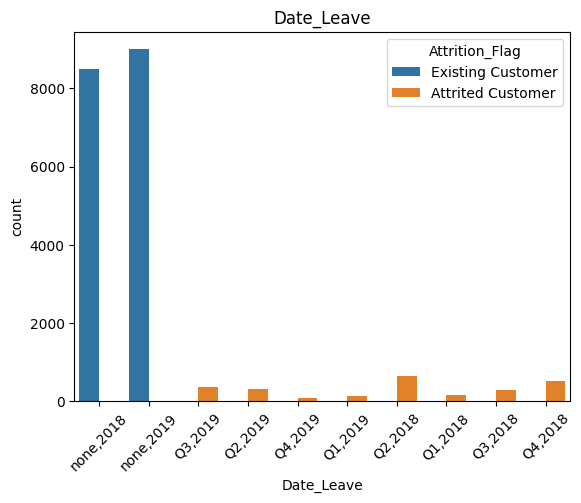

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
sns.pairplot(df, hue='Attrition_Flag', diag_kind='kde')
plt.show()

# Plot histograms of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.histplot(df, x=col, hue='Attrition_Flag', kde=True)
    plt.title(col)
    plt.show()

# Visualize categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Attrition_Flag')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

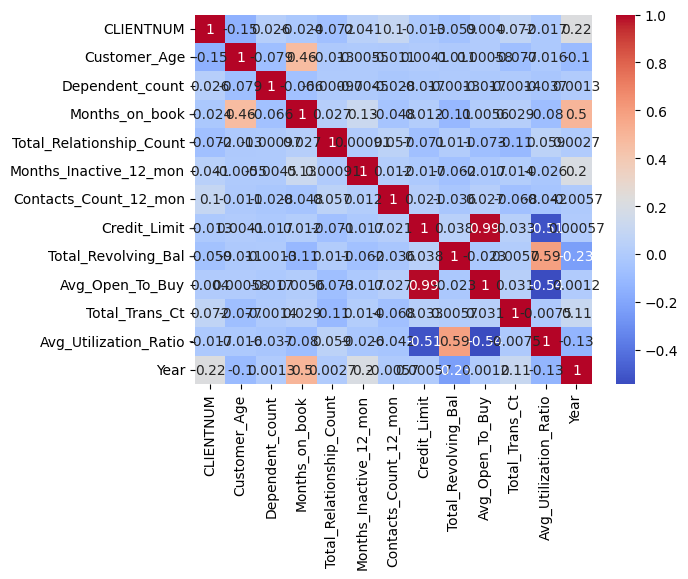

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only = 'True')

# Visualize the correlation using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Test if there's a significant difference in customer age between attrition and non-attrition groups
attrition_age = df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
non_attrition_age = df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age']

t_stat, p_value = ttest_ind(attrition_age, non_attrition_age)
if p_value < 0.05:
    print("There is a significant difference in age between attrition and non-attrition groups.")

There is a significant difference in age between attrition and non-attrition groups.


In [21]:
from tabulate import tabulate
import numpy as np

def summary(data: pd.DataFrame, x: str):
    """
    The function prints the 5 point summary and histogram, box plot,
    violin plot, and cumulative density distribution plots for each
    feature name passed as the argument.

    Parameters:
    ----------

    x: str, feature name

    Usage:
    ------------

    summary('age')
    """
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)

    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Customer_age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    24 |   41 |   47 |   52 |    65 |
+-------+-------+------+------+------+-------+


<ipython-input-21-de0f6db509d8>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color="purple")


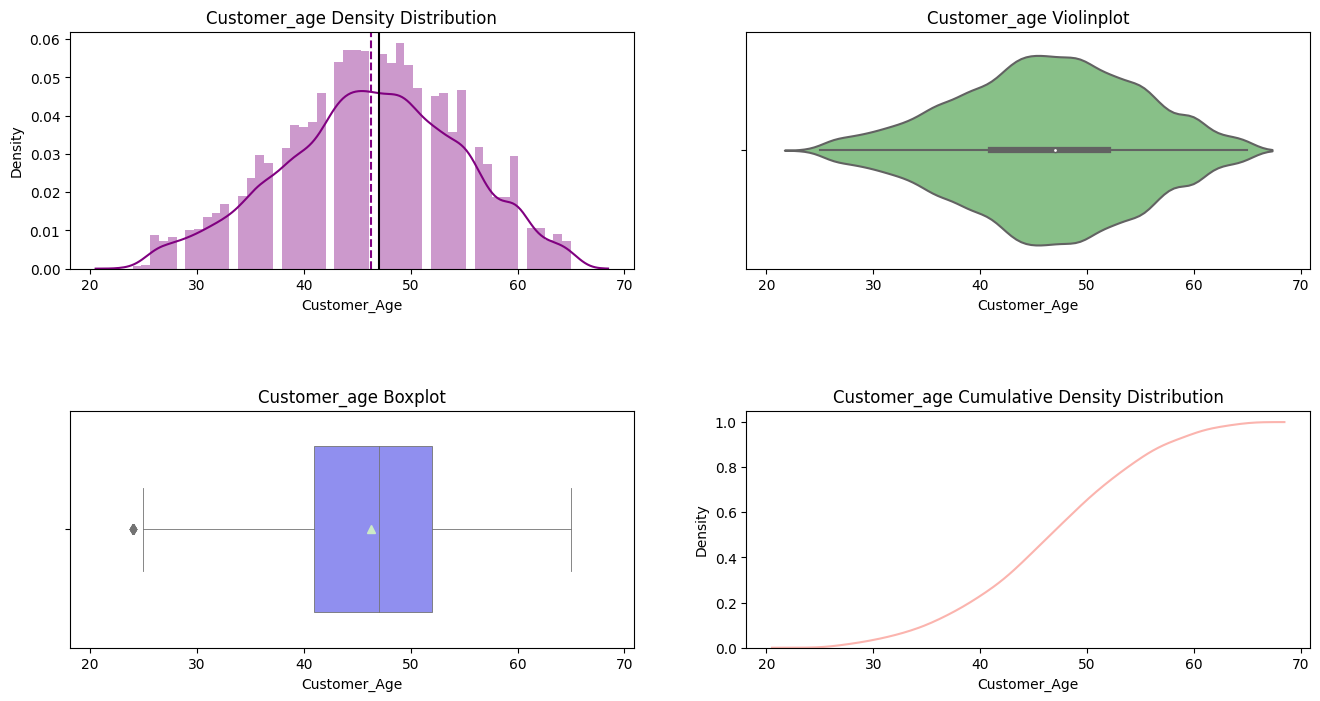

In [22]:
summary(df, "Customer_Age")

5 Point Summary of Dependent_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    2 |    3 |     5 |
+-------+-------+------+------+------+-------+


<ipython-input-21-de0f6db509d8>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color="purple")


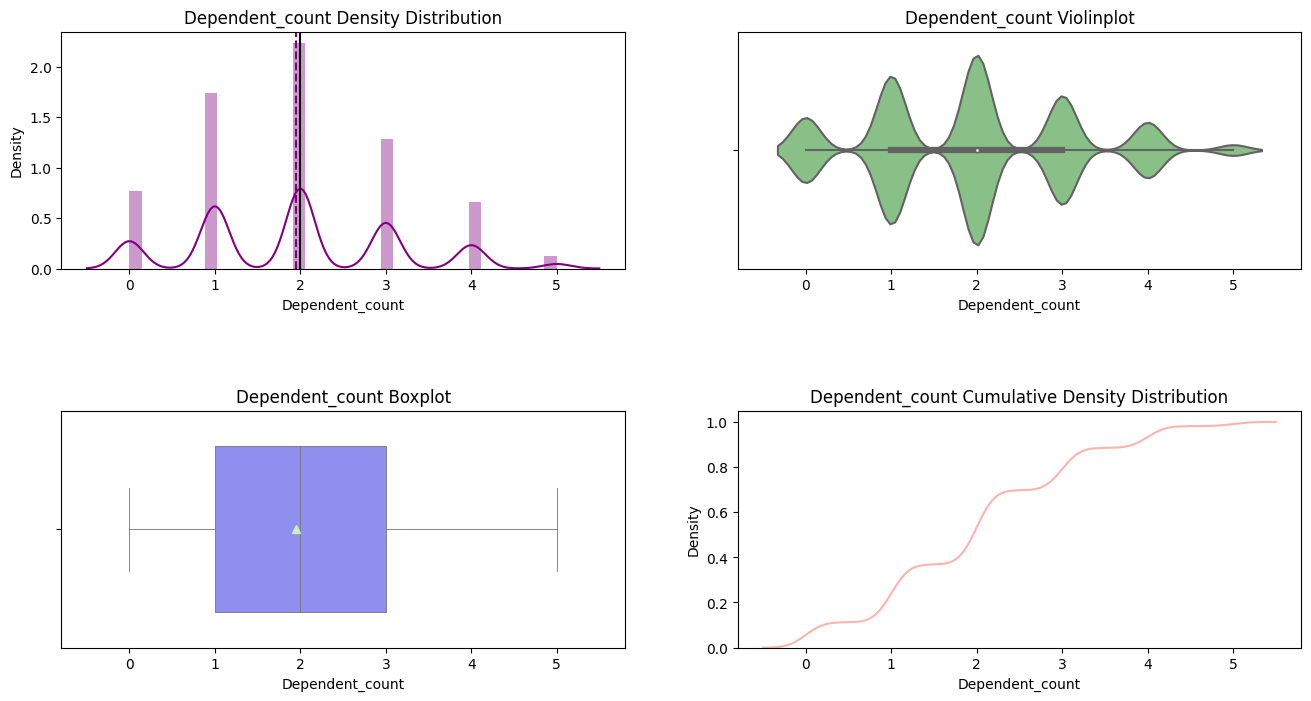

In [26]:
summary(df, "Dependent_count")

5 Point Summary of Months_on_book Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |   35 |   41 |   48 |    68 |
+-------+-------+------+------+------+-------+


<ipython-input-21-de0f6db509d8>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color="purple")


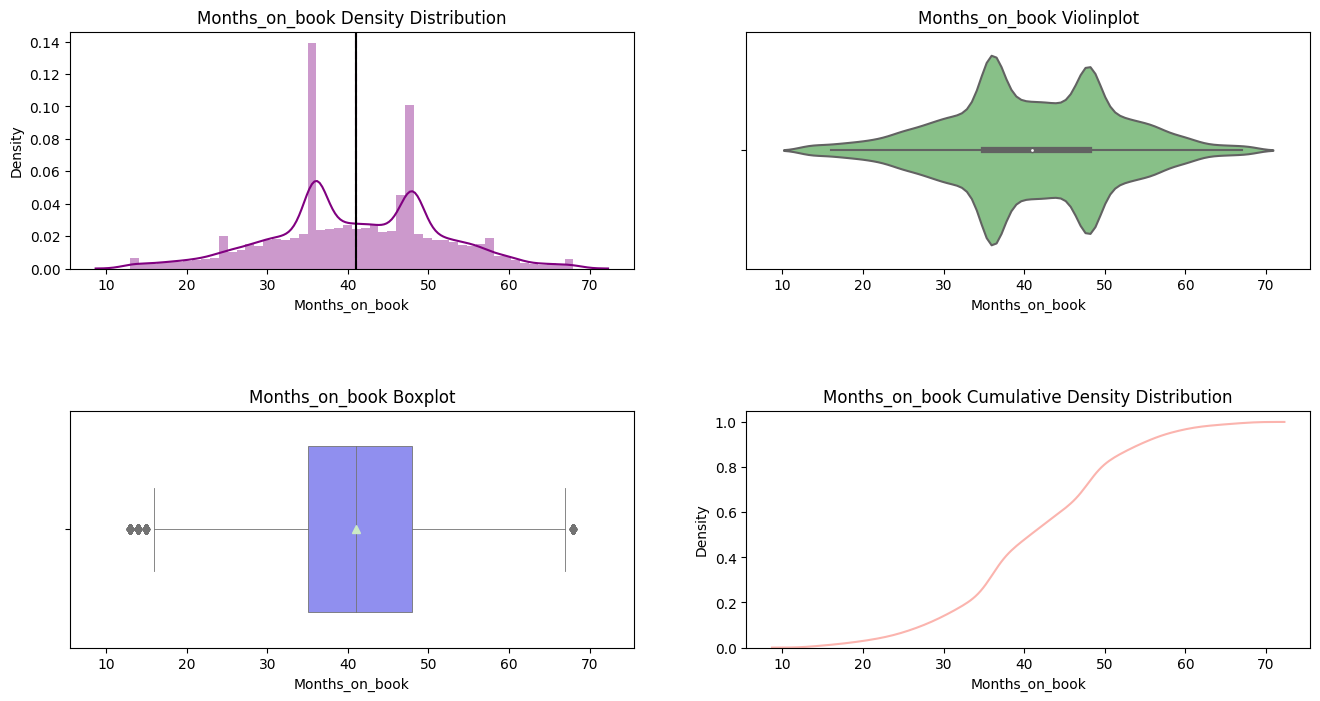

In [31]:
summary(df, "Months_on_book")

5 Point Summary of Total_relationship_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    5 |     6 |
+-------+-------+------+------+------+-------+


<ipython-input-21-de0f6db509d8>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data[x], color="purple")


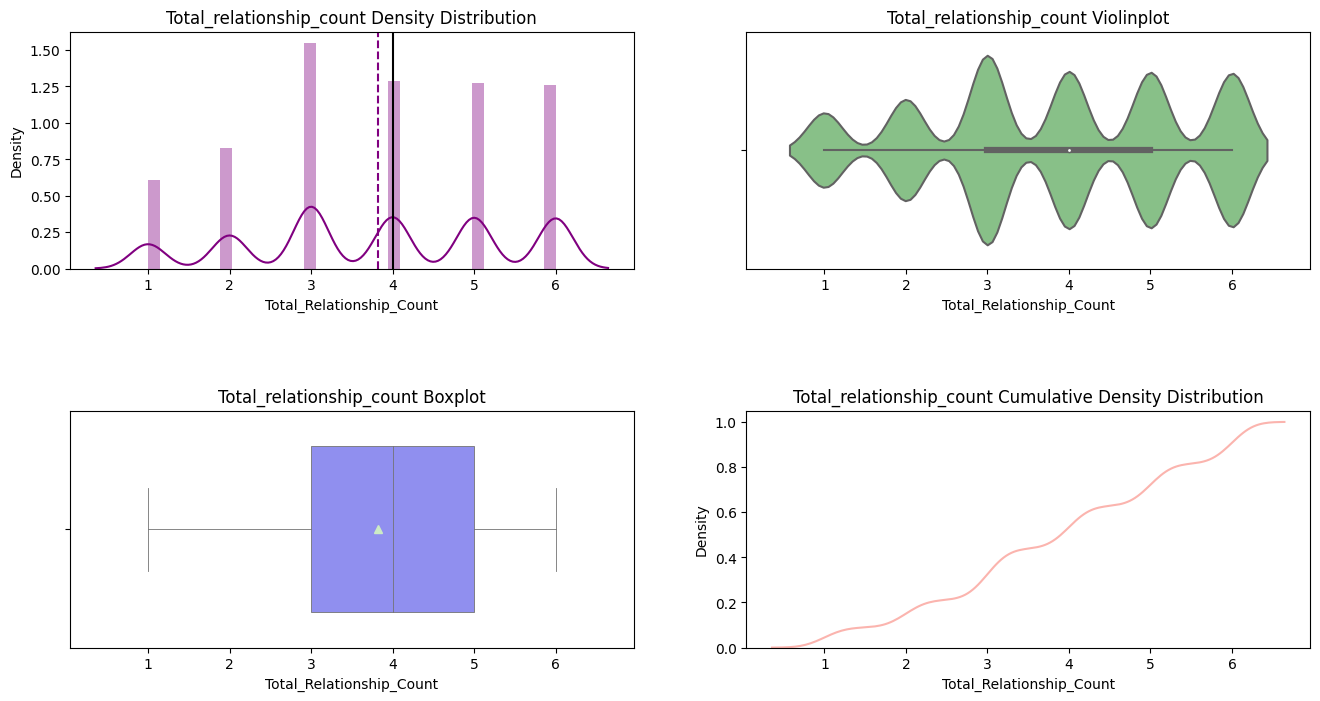

In [33]:
summary(df, "Total_Relationship_Count")

In [47]:
df[df["Credit_Limit"] > 2500]["Income_Category"].value_counts(normalize=True)

$40K - $60K       0.436103
$60K - $80K       0.260966
Less than $40K    0.133762
$80K - $120K      0.132713
$120K +           0.036457
Name: Income_Category, dtype: float64

In [46]:
df[df["Credit_Limit"] > 2500]["Card_Category"].value_counts(normalize=True)

Silver      0.427775
Blue        0.341158
Gold        0.151728
Platinum    0.079339
Name: Card_Category, dtype: float64

In [48]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(df, ['age'], 'prodtaken')
    '''

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

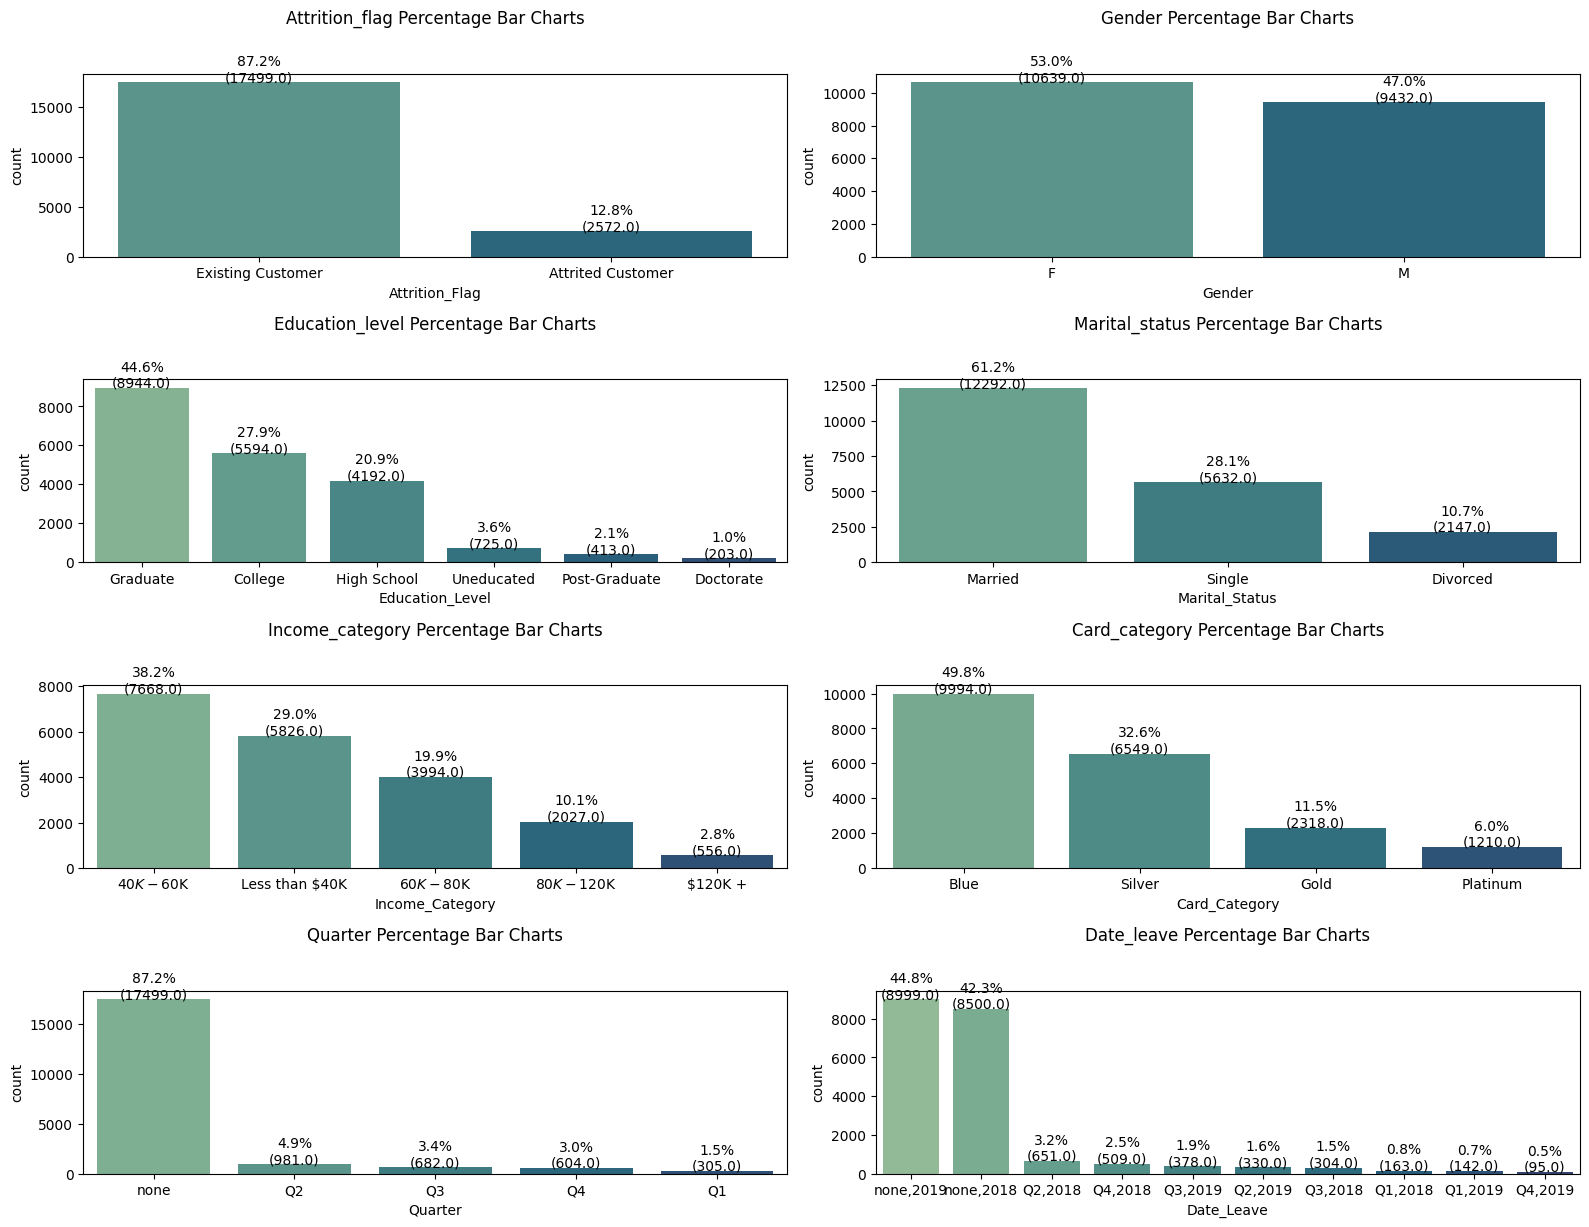

In [51]:
category_columns = df.select_dtypes(include="object").columns.tolist()
df[category_columns] = df[category_columns].astype("category")

category_columns = df.select_dtypes(include="category").columns.tolist()
target_variable = "Attrition_Flag"
perc_on_bar(df, category_columns, target_variable)

In [53]:
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 20071 non-null  int64   
 1   attrition_flag            20071 non-null  category
 2   customer_age              20071 non-null  int64   
 3   gender                    20071 non-null  category
 4   dependent_count           20071 non-null  int64   
 5   education_level           20071 non-null  category
 6   marital_status            20071 non-null  category
 7   income_category           20071 non-null  category
 8   card_category             20071 non-null  category
 9   months_on_book            20071 non-null  int64   
 10  total_relationship_count  20071 non-null  int64   
 11  months_inactive_12_mon    20071 non-null  int64   
 12  contacts_count_12_mon     20071 non-null  int64   
 13  credit_limit              20071 non-null  floa

<ipython-input-54-68d3335717f6>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean.corr(),


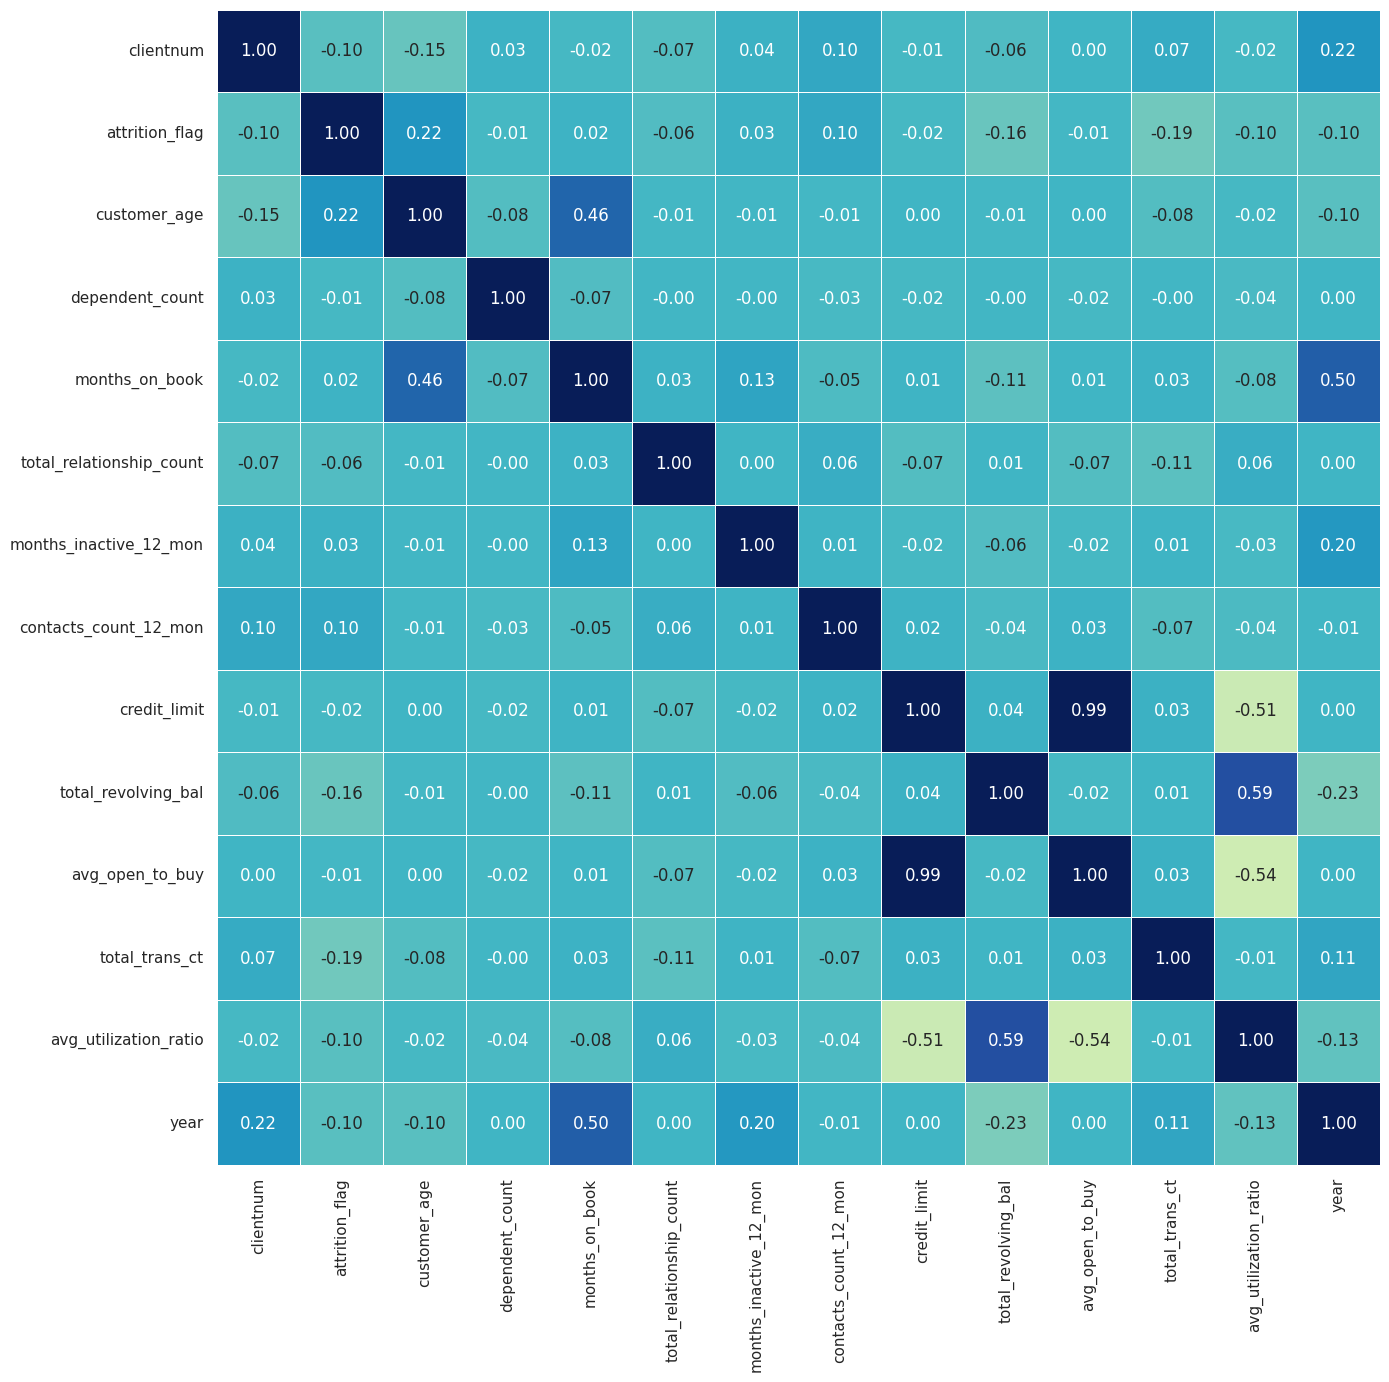

In [54]:
# Plotting correlation heatmap of the features
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = df.copy()
data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()